# Final Project -- Data Analysis on IBM HR Analytics Attrition and Performance

Name: *Cindy Miao, Haiying Lin, Susie Liang*

Due Date: *03 / 22 / 24*

In [1]:
# Enviroment
versioninfo()

Julia Version 1.10.0
Commit 3120989f39 (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 8 × 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, tigerlake)
  Threads: 1 on 8 virtual cores
Environment:
  JULIA_NUM_THREADS = 


In [2]:
import Pkg
Pkg.activate("C:\\Users\\87025\\.julia\\environments\\v1.10")
Pkg.status()

  Activating project at `C:\Users\87025\.julia\environments\v1.10`


Status `C:\Users\87025\.julia\environments\v1.10\Project.toml`
  [336ed68f] CSV v0.10.13
⌅ [324d7699] CategoricalArrays v0.9.7
⌅ [a93c6f00] DataFrames v0.22.7
⌅ [31c24e10] Distributions v0.24.18
  [41a02a25] Folds v0.2.10
  [da1fdf0e] FreqTables v0.4.6
⌃ [38e38edf] GLM v1.8.3
  [8d5ece8b] GLMNet v0.7.2
⌃ [09f84164] HypothesisTests v0.10.13
  [7073ff75] IJulia v1.24.2
⌃ [82e4d734] ImageIO v0.5.9
  [6218d12a] ImageMagick v1.3.1
⌃ [b4fcebef] Lasso v0.6.1
⌃ [38d8eb38] Lathe v0.1.6
⌅ [f0e99cf1] MLBase v0.8.0
  [cc2ba9b6] MLDataUtils v0.5.4
⌃ [eb30cadb] MLDatasets v0.5.15
⌃ [add582a8] MLJ v0.16.5
⌅ [a7f614a8] MLJBase v0.18.1
⌃ [094fc8d1] MLJFlux v0.1.10
⌃ [6ee0df7b] MLJLinearModels v0.9.0
⌃ [1b6a4a23] MLJMultivariateStatsInterface v0.3.2
⌃ [636a865e] NearestNeighborModels v0.2.1
  [8b842266] PalmerPenguins v0.1.4
⌃ [ef544631] Pipelines v0.8.5
  [91a5bcdd] Plots v1.40.2
  [438e738f] PyCall v1.96.4
  [ce6b1742] RDatasets v0.7.7
⌃ [f535d66d] ROCAnalysis v0.3.3
  [860ef19b] StableRNGs v1.0.1
⌅ [

In [13]:
# packages use for the project
using CSV, DataFrames, Statistics, StatsBase, Plots, StatsPlots, Random, StableRNGs
using MLDataUtils, MLBase
using GLM, GLMNet
using CategoricalArrays
using MLJ, MLJFlux, MLJLinearModels, MLJMultivariateStatsInterface 
using NearestNeighborModels

Precompiling StatsPlots
  ? StatsFuns
  ? Distributions
  ? KernelDensity
        Info Given StatsPlots was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? StatsPlots
[ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd].
Precompiling Distributions
  ? StatsFuns
        Info Given Distributions was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Distributions
[ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
ERROR: Method overwriti

#### Exploratory Data Analysis

In [14]:
IBM_Employee = CSV.read("WA_Fn-UseC_-HR-Employee-Attrition.csv", DataFrame, stringtype = String)
first(IBM_Employee,5)

5×35 DataFrame
 Row │ Age    Attrition  BusinessTravel     DailyRate  Department              ⋯
     │ Int64  String     String             Int64      String                  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    41  Yes        Travel_Rarely           1102  Sales                   ⋯
   2 │    49  No         Travel_Frequently        279  Research & Development
   3 │    37  Yes        Travel_Rarely           1373  Research & Development
   4 │    33  No         Travel_Frequently       1392  Research & Development
   5 │    27  No         Travel_Rarely            591  Research & Development  ⋯
                                                              30 columns omitted

***Data Cleaning***

In [15]:
# remove the unnecessary categories: EmployeeCount, EmployeeNumber,Over18, and StandardHours, left 31 variables
IBM_Employee = select(IBM_Employee, Not([:EmployeeCount, :EmployeeNumber, :Over18, :StandardHours]))
first(IBM_Employee, 5)

5×31 DataFrame
 Row │ Age    Attrition  BusinessTravel     DailyRate  Department              ⋯
     │ Int64  String     String             Int64      String                  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    41  Yes        Travel_Rarely           1102  Sales                   ⋯
   2 │    49  No         Travel_Frequently        279  Research & Development
   3 │    37  Yes        Travel_Rarely           1373  Research & Development
   4 │    33  No         Travel_Frequently       1392  Research & Development
   5 │    27  No         Travel_Rarely            591  Research & Development  ⋯
                                                              26 columns omitted

In [16]:
IBM = copy(IBM_Employee)  # copy of original dataset for Classification

# Change Attrition to factors "Yes" = 1 & "No" = 0
IBM_Employee.Attrition = map(x -> x == "Yes" ? 1 : 0, IBM_Employee.Attrition)
first(IBM_Employee, 5)

5×31 DataFrame
 Row │ Age    Attrition  BusinessTravel     DailyRate  Department              ⋯
     │ Int64  Int64      String             Int64      String                  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    41          1  Travel_Rarely           1102  Sales                   ⋯
   2 │    49          0  Travel_Frequently        279  Research & Development
   3 │    37          1  Travel_Rarely           1373  Research & Development
   4 │    33          0  Travel_Frequently       1392  Research & Development
   5 │    27          0  Travel_Rarely            591  Research & Development  ⋯
                                                              26 columns omitted

***Data Exploration and Visualization***

In [15]:
describe(IBM_Employee, :mean, :min, :max, :q25, :median, :q75, :nmissing, :eltype)

31×9 DataFrame
 Row │ variable                  mean      min              max                ⋯
     │ Symbol                    Union…    Any              Any                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Age                       36.9238   18               60                 ⋯
   2 │ Attrition                 0.161224  0                1
   3 │ BusinessTravel                      Non-Travel       Travel_Rarely    
   4 │ DailyRate                 802.486   102              1499
   5 │ Department                          Human Resources  Sales              ⋯
   6 │ DistanceFromHome          9.19252   1                29
   7 │ Education                 2.91293   1                5
   8 │ EducationField                      Human Resources  Technical Degree 
  ⋮  │            ⋮                 ⋮             ⋮                ⋮           ⋱
  25 │ TotalWorkingYears         11.2796   0                40                 ⋯
  26 │ TrainingTimesLastYear     2.79932   0                6
  27 │ WorkLifeBalance           2.76122   1                4
  28 │ YearsAtCompany            7.00816   0                40
  29 │ YearsInCurrentRole        4.22925   0                18                 ⋯
  30 │ YearsSinceLastPromotion   2.18776   0                15
  31 │ YearsWithCurrManager      4.12313   0                17
                                                   5 columns and 16 rows omitted

***Correlation Matrix***

In [27]:
numerical_cols = select(IBM_Employee, names(IBM_Employee, Int64))
# Compute the correlation matrix
cor_matrix = cor(Matrix(numerical_cols))

24×24 Matrix{Float64}:
  1.0         -0.159205     0.0106609   …   0.216513     0.202089
 -0.159205     1.0         -0.056652       -0.0330188   -0.156199
  0.0106609   -0.056652     1.0            -0.033229    -0.0263632
 -0.00168612   0.0779236   -0.00498534      0.0100288    0.014406
  0.208034    -0.0313728   -0.0168064       0.0542543    0.0690654
  0.0101464   -0.103369     0.0183549   …   0.0161936   -0.00499872
  0.0242865   -0.00684555   0.0233814      -0.0267156   -0.0201232
  0.02982     -0.130016     0.0461349      -0.0241843    0.0259758
  0.509604    -0.169105     0.00296633      0.353885     0.375281
 -0.00489188  -0.103481     0.030571       -0.0182136   -0.0276562
  ⋮                                     ⋱               
  0.0535347   -0.0458723    0.00784603  …   0.0334925   -0.000867497
  0.0375097   -0.137145     0.0421428       0.0143522    0.0246982
  0.680381    -0.171063     0.0145147       0.404858     0.459188
 -0.0196208   -0.0594778    0.00245254     -0.00206

In [45]:
numerical = select(numerical_cols, Not([:Age,:Attrition,:Education,:EnvironmentSatisfaction,:JobInvolvement,:JobLevel,:JobSatisfaction,:PerformanceRating,:RelationshipSatisfaction,:StockOptionLevel,:WorkLifeBalance]))
numerical_matrix = Matrix(numerical)


1470×13 Matrix{Int64}:
 1102   1  94   5993  19479  8  11   8  0   6  4  0  5
  279   8  61   5130  24907  1  23  10  3  10  7  1  7
 1373   2  92   2090   2396  6  15   7  3   0  0  0  0
 1392   3  56   2909  23159  1  11   8  3   8  7  3  0
  591   2  40   3468  16632  9  12   6  3   2  2  2  2
 1005   2  79   3068  11864  0  13   8  2   7  7  3  6
 1324   3  81   2670   9964  4  20  12  3   1  0  0  0
 1358  24  67   2693  13335  1  22   1  2   1  0  0  0
  216  23  44   9526   8787  0  21  10  2   9  7  1  8
 1299  27  94   5237  16577  6  13  17  3   7  7  7  7
    ⋮                        ⋮                 ⋮     
  410  28  39  10854  16586  4  13  20  3   3  2  2  0
  722  24  60  12031   8828  0  11  21  2  20  9  9  6
  325   5  74   9936   3787  0  19  10  2   9  4  1  7
 1167   5  30   2966  21378  0  18   5  2   4  2  0  0
  884  23  41   2571  12290  4  17  17  3   5  2  0  3
  613   6  42   9991  21457  4  15   9  5   7  7  1  7
  155   4  87   6142   5174  1  20   6  0  

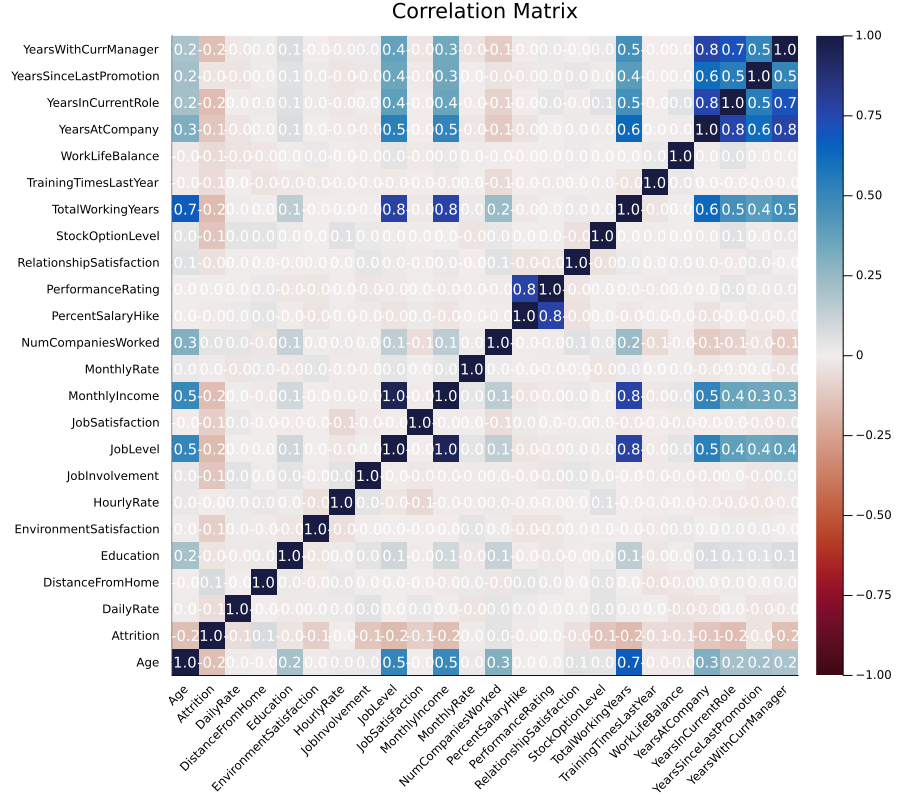

In [76]:
vars = names(numerical_cols)[1:24]
fig = heatmap(cor_matrix,
  title = "Correlation Matrix",
  clims = (-1, 1),
  xticks = (1:24, vars),
  yticks = (1:24, vars),
  color = cgrad(:balance, rev = true),
  xrot = 45,
  aspect = :ratio,
  size = (900, 800),
)
for j in axes(cor_matrix, 2), i in axes(cor_matrix, 1)
  annotate!(i, j, text("$(round(cor_matrix[i,j], digits = 1))", :white, 10))
end
fig

***Attrition Distribution***

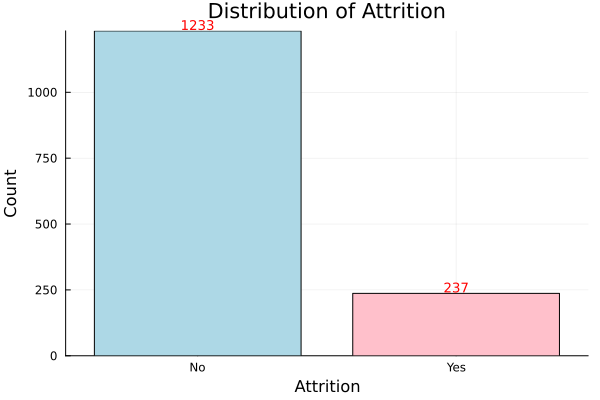

In [77]:
# Count the number of occurrences for each level of Attrition
attrition_counts = countmap(IBM_Employee[!, :Attrition])

# Extract the counts for '0' and '1' ensuring we have a count for each, even if missing
no_attrition_count = get(attrition_counts, 0, 0)
yes_attrition_count = get(attrition_counts, 1, 0)

colors = ["#ADD8E6", "#FFC0CB"]

# Create a bar chart and assign it to a variable
p = bar(["No", "Yes"], [no_attrition_count, yes_attrition_count], color=colors, legend=false)

# Annotate counts above bars
annotate!(p, [(0.5, no_attrition_count + 22, text(string(no_attrition_count), :center, 9, :red)),
              (1.5, yes_attrition_count + 22, text(string(yes_attrition_count), :center, 9, :red))])

# Customize the plot
xlabel!(p, "Attrition")
ylabel!(p, "Count")
title!(p, "Distribution of Attrition")
display(p)

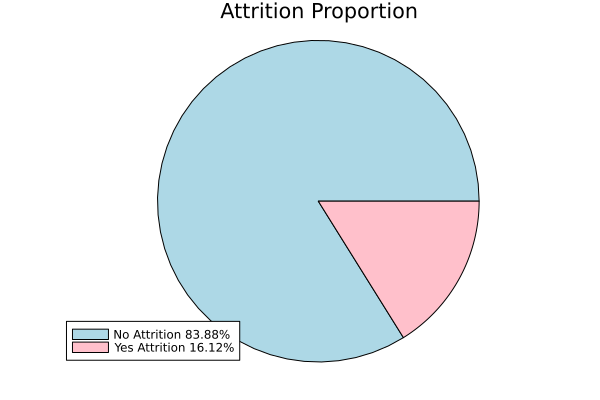

In [78]:
# Calculate proportions for the pie chart
total_count = no_attrition_count + yes_attrition_count
proportions = [no_attrition_count / total_count, yes_attrition_count / total_count]

# Create the pie chart with labels showing the proportions
labels = ["No Attrition $(round(proportions[1]*100; digits=2))%", "Yes Attrition $(round(proportions[2]*100; digits=2))%"]
p = pie(labels, proportions, legend=:bottomleft, color=["#ADD8E6", "#FFC0CB"])

title!("Attrition Proportion")
display(p)


***Attrition vs. Age***

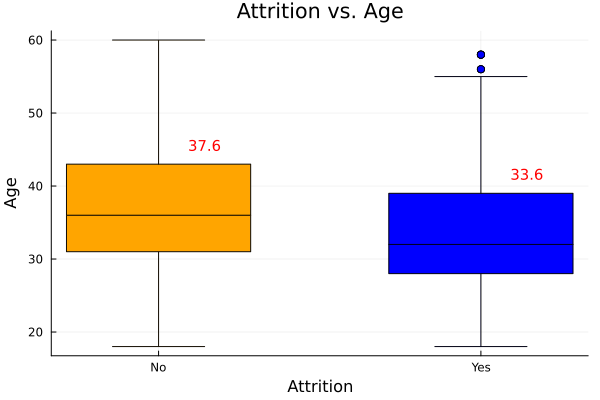

In [79]:
# Convert Attrition to a string for plotting purposes
IBM_Employee[!, :Attrition] = string.(IBM_Employee[!, :Attrition])

# Replace "0" with "No" and "1" with "Yes" for clear plotting
IBM_Employee[!, :Attrition] = replace.(IBM_Employee[!, :Attrition], "0" => "No", "1" => "Yes")

col = [:orange :blue]
# Create the box plot with separate colors for "No" and "Yes"
p = boxplot(IBM_Employee[!, :Attrition], IBM_Employee[!, :Age], 
            group=IBM_Employee[!, :Attrition], legend=false, color=[:orange :blue],
            ylabel="Age", xlabel="Attrition", title="Attrition vs. Age")
            
# Calculate the mean age for 'No' and 'Yes' groups
mean_age_no = mean(IBM_Employee[IBM_Employee[!, :Attrition] .== "No", :Age])
mean_age_yes = mean(IBM_Employee[IBM_Employee[!, :Attrition] .== "Yes", :Age])

# Adding text annotations for the mean ages at an offset above the means
y_offset = 8  # This is an arbitrary offset for display purposes, adjust as needed.
annotate!([(1 - 0.3, mean_age_no + y_offset, text(round(mean_age_no, digits=1), :center, 10, :red)),
           (2.1, mean_age_yes + y_offset, text(round(mean_age_yes, digits=1), :center, 10, :red))])

# Display the boxplot with the mean annotations
display(p)

***Attrition vs. Gender***

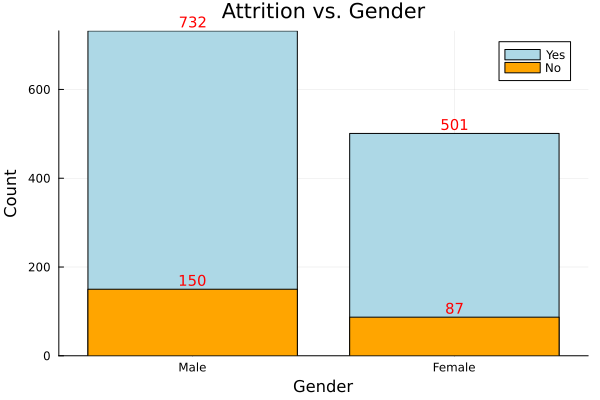

In [80]:
# Group data by 'Gender' and 'Attrition' and then count the occurrences
grouped_data = groupby(IBM_Employee, [:Gender, :Attrition])
count_data = combine(grouped_data, nrow => :count)

# Separate the counts for female and male
female_counts = count_data[count_data.Gender .== "Female", :]
male_counts = count_data[count_data.Gender .== "Male", :]

# Plot the bar chart with labels showing the counts
bar_chart = bar(count_data[!, :Gender], count_data[!, :count],
                group=count_data[!, :Attrition],
                color=[:lightblue :orange],
                ylabel="Count", xlabel="Gender", title="Attrition vs. Gender",
                labels=["Yes" "No"])  
 
# Annotate counts above bars
annotate!(1.5, female_counts[1, :count] + 20, text(string(female_counts[1, :count]), :center, 10, :red))
annotate!(1.5, female_counts[2, :count] + 20, text(string(female_counts[2, :count]), :center, 10, :red))
annotate!(0.5, male_counts[1, :count] + 20, text(string(male_counts[1, :count]), :center, 10, :red))
annotate!(0.5, male_counts[2, :count] + 20, text(string(male_counts[2, :count]), :center, 10, :red))

# Display the bar chart
display(bar_chart)


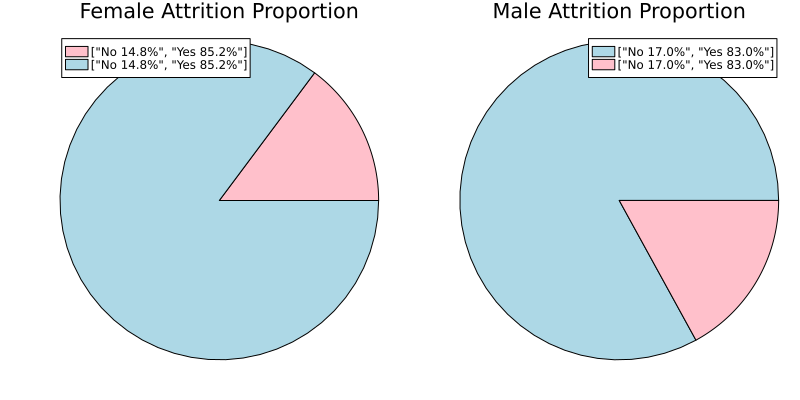

female_labels = ["No $(round(female_proportions[1] * 100, digits = 1))%", "Yes $(round(female_proportions[2] * 100, digits = 1))%"] = ["No 14.8%", "Yes 85.2%"]
male_labels = ["No $(round(male_proportions[2] * 100, digits = 1))%", "Yes $(round(male_proportions[1] * 100, digits = 1))%"] = ["No 17.0%", "Yes 83.0%"]


In [81]:
# Calculate proportions for females and males
female_total = sum(female_counts.count)
male_total = sum(male_counts.count)

female_proportions = female_counts.count / female_total
male_proportions = male_counts.count / male_total

# Define labels for the pie charts
@show female_labels = ["No $(round(female_proportions[1] * 100, digits=1))%", 
                 "Yes $(round(female_proportions[2] * 100, digits=1))%"]
@show male_labels = ["No $(round(male_proportions[2] * 100, digits=1))%", 
               "Yes $(round(male_proportions[1] * 100, digits=1))%"]

# Create pie charts
plot_pie_gender = plot(layout = (1, 2), size=(800, 400))

pie!(plot_pie_gender[1], female_counts.count, label=female_labels, title="Female Attrition Proportion", color=[:pink, :lightblue])
pie!(plot_pie_gender[2], male_counts.count, label=male_labels, title="Male Attrition Proportion", color=[:lightblue, :pink])

# Display pie charts
display(plot_pie_gender)

***Attrition vs. Business Travel Frequency***

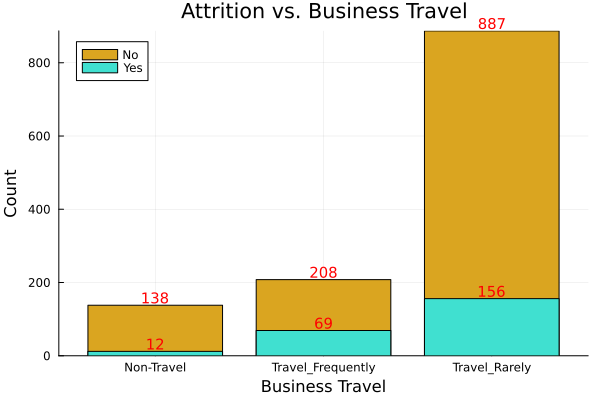

In [82]:
# Group data by 'BusinessTravel' and 'Attrition' and then count the occurrences
grouped_data = groupby(IBM_Employee, [:BusinessTravel, :Attrition])
count_data = combine(grouped_data, nrow => :count)

# Sort the data to ensure consistent plotting
sort!(count_data, [:BusinessTravel, :Attrition])

# Extract the labels for each bar which are the counts
bar_labels = string.(count_data[:, :count])

# Plot the bar chart with labels showing the counts
bar_chart = bar(count_data[!, :BusinessTravel], count_data[!, :count],
                group=count_data[!, :Attrition],
                color=[:goldenrod :turquoise], legend=:topleft,
                ylabel="Count", xlabel="Business Travel", title="Attrition vs. Business Travel",
                label=["No" "Yes"])

# Annotate counts above bars
# Non-Travel labels
annotate!(0.5, count_data[1, :count] + 20, text(string(count_data[1, :count]), :center, 10, :red))
annotate!(0.5, count_data[2, :count] + 20, text(string(count_data[2, :count]), :center, 10, :red))
# Travel-Frequently labels
annotate!(1.5, count_data[3, :count] + 20, text(string(count_data[3, :count]), :center, 10, :red))
annotate!(1.5, count_data[4, :count] + 20, text(string(count_data[4, :count]), :center, 10, :red))
# Travel-Rarely labels
annotate!(2.5, count_data[5, :count] + 20, text(string(count_data[5, :count]), :center, 10, :red))
annotate!(2.5, count_data[6, :count] + 20, text(string(count_data[6, :count]), :center, 10, :red))

# Display the bar chart
display(bar_chart)

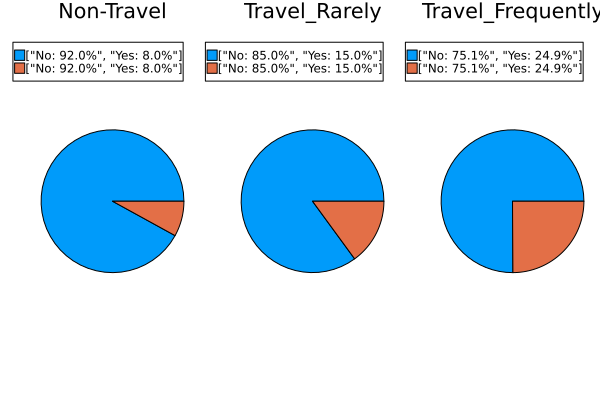

In [83]:
# Create a DataFrame to hold the pie chart data
pie_data = DataFrame(BusinessTravel = String[], Attrition = String[], Proportion = Float64[], Label = String[])

# Calculate proportions and labels for each business travel category
for bt in unique(IBM_Employee[!, :BusinessTravel])
    # Filter count_data for each BusinessTravel category
    bt_data = count_data[count_data[!, :BusinessTravel] .== bt, :]
    
    total = sum(bt_data[!, :count])
    for row in eachrow(bt_data)
        prop = row.count / total
        label = "$(row.Attrition == "Yes" ? "Yes" : "No"): $(round(prop * 100, digits=1))%"
        push!(pie_data, (bt, row.Attrition, prop, label))
    end
end

# Function to generate a pie chart for a specific BusinessTravel category
function generate_pie_chart(data, category)
    cat_data = data[data[!, :BusinessTravel] .== category, :]
    pie(cat_data[!, :Proportion], labels=cat_data[!, :Label], title=category)
end

# Generate pie charts for each BusinessTravel category
p1 = generate_pie_chart(pie_data, "Non-Travel")
p2 = generate_pie_chart(pie_data, "Travel_Rarely")
p3 = generate_pie_chart(pie_data, "Travel_Frequently")

# Combine pie charts into a single figure
pie_charts = plot(p1, p2, p3, layout=(1, 3))

# Display pie charts
display(pie_charts)


***Attrition vs. Department***

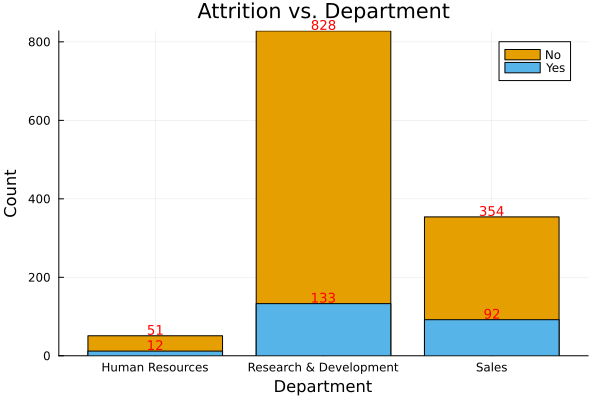

In [84]:
# Group data by 'Department' and 'Attrition' and then count the occurrences
grouped_data = groupby(IBM_Employee, [:Department, :Attrition])
count_data = combine(grouped_data, nrow => :count)

# Sort the data to ensure consistent plotting
sort!(count_data, [:Department, :Attrition])

# Create bar chart
bar_chart = bar(count_data[!, :Department], count_data[!, :count],
                group=count_data[!, :Attrition],
                color=["#E69F00" "#56B4E9"], legend=:topright,
                ylabel="Count", xlabel="Department", title="Attrition vs. Department")

# Annotate counts on the bars
for (i, row) in enumerate(eachrow(count_data))
    annotate!(bar_chart, row[:Department], row[:count] + 15, text(string(row[:count]), :center, 9, :red))
end

# Display the bar chart
display(bar_chart)

***Attrition vs. Education Field***

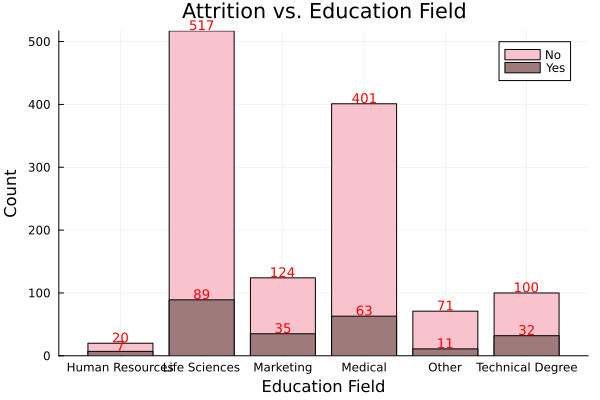

In [85]:
# Group data by 'EducationField' and 'Attrition' and then count the occurrences
grouped_data = groupby(IBM_Employee, [:EducationField, :Attrition])
count_data = combine(grouped_data, nrow => :count)

# Sort the data to ensure consistent plotting
sort!(count_data, [:EducationField, :Attrition])

# Create bar chart
bar_chart = bar(count_data[!, :EducationField], count_data[!, :count],
                group=count_data[!, :Attrition],
                color=["#F8C3CD" "#9E7A7A"], legend=:topright,
                ylabel="Count", xlabel="Education Field", title="Attrition vs. Education Field")

# Annotate counts above the bars
for (i, row) in enumerate(eachrow(count_data))
    annotate!(bar_chart, (row[:EducationField], row[:count] + 9, text(string(row[:count]), 9, :center, :red)))
end
# Display the bar chart
display(bar_chart)

***Attrition vs. Environment Satisfaction***

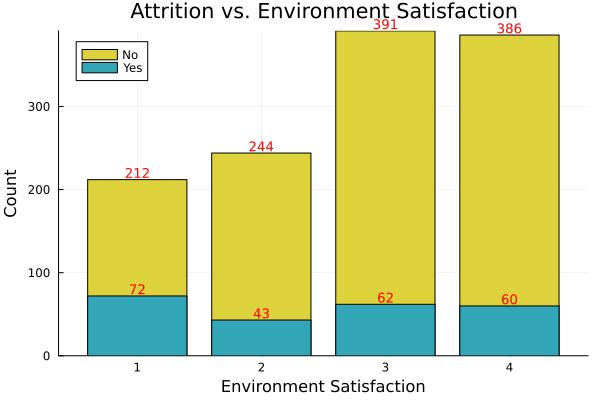

In [86]:
# Group data by 'EnvironmentSatisfaction' and 'Attrition' and then count the occurrences
grouped_data = groupby(IBM_Employee, [:EnvironmentSatisfaction, :Attrition])
count_data = combine(grouped_data, nrow => :count)

# Sort the data to ensure consistent plotting
sort!(count_data, [:EnvironmentSatisfaction, :Attrition])

# Create a bar chart
bar_chart = bar(count_data[!, :EnvironmentSatisfaction], count_data[!, :count],
                group=count_data[!, :Attrition],
                color=["#DDD23B" "#33A6B8"], legend=:topleft,
                ylabel="Count", xlabel="Environment Satisfaction", title="Attrition vs. Environment Satisfaction")
# Annotate counts above the bars
for (i, row) in enumerate(eachrow(count_data))
    annotate!(bar_chart, (row[:EnvironmentSatisfaction], row[:count] + 8, text(string(row[:count]), 9, :center, :red)))
end

# Display the bar chart
display(bar_chart)

***Data Standardization***

In [52]:
using DataFrames
using StatsBase

In [61]:
numerical = select(numerical_cols, Not([:Age,:Attrition,:Education,:EnvironmentSatisfaction,:JobInvolvement,:JobLevel,:JobSatisfaction,:PerformanceRating,:RelationshipSatisfaction,:StockOptionLevel,:WorkLifeBalance]))
numerical_matrix = Matrix(numerical)
numerical_matrix_float = float(numerical_matrix)
dt = StatsBase.fit(ZScoreTransform, numerical_matrix_float; dims=1)
input_standardized=StatsBase.transform!(dt, numerical_matrix_float)

1470×13 Matrix{Float64}:
  0.742274  -1.01057    1.38267    …  -0.0632744  -0.678915    0.24575
 -1.29733   -0.1471    -0.240595       0.764737   -0.36859     0.806267
  1.41388   -0.887213   1.28429       -1.16729    -0.678915   -1.15554
  1.46097   -0.763861  -0.486544       0.764737    0.25206    -1.15554
 -0.524116  -0.887213  -1.27358       -0.615282   -0.0582651  -0.595025
  0.501883  -0.887213   0.644821   …   0.764737    0.25206     0.526009
  1.29245   -0.763861   0.743201      -1.16729    -0.678915   -1.15554
  1.37671    1.82654    0.0545438     -1.16729    -0.678915   -1.15554
 -1.45346    1.70318   -1.07682        0.764737   -0.36859     1.08653
  1.23049    2.19659    1.38267        0.764737    1.49336     0.806267
  ⋮                                ⋱   ⋮                      
 -0.972681   2.31995   -1.32277       -0.615282   -0.0582651  -1.15554
 -0.199464   1.82654   -0.289785       1.31675     2.11401     0.526009
 -1.18333   -0.517156   0.398872      -0.0632744  -0.36

In [64]:
describe(numerical)

13×7 DataFrame
 Row │ variable                 mean         min    median   max    nmissing   ⋯
     │ Symbol                   Float64      Int64  Float64  Int64  Int64      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ DailyRate                  802.486      102    802.0   1499         0   ⋯
   2 │ DistanceFromHome             9.19252      1      7.0     29         0
   3 │ HourlyRate                  65.8912      30     66.0    100         0
   4 │ MonthlyIncome             6502.93      1009   4919.0  19999         0
   5 │ MonthlyRate              14313.1       2094  14235.5  26999         0   ⋯
   6 │ NumCompaniesWorked           2.6932       0      2.0      9         0
   7 │ PercentSalaryHike           15.2095      11     14.0     25         0
   8 │ TotalWorkingYears           11.2796       0     10.0     40         0
   9 │ TrainingTimesLastYear        2.79932      0      3.0      6         0   ⋯
  10 │ YearsAtCompany               7.00816      0      5.0     40         0
  11 │ YearsInCurrentRole           4.22925      0      3.0     18         0
  12 │ YearsSinceLastPromotion      2.18776      0      1.0     15         0
  13 │ YearsWithCurrManager         4.12313      0      3.0     17         0   ⋯
                                                                1 column omitted

In [68]:
using CSV
input_standardized = DataFrame(input_standardized)
rename!(input_standardized, [:DailyRate, :DistanceFromHome, :HourlyRate,:MonthlyIncome,:MonthlyRate,:NumCompaniesWorked,
                             :PercentSalaryHike,:TotalWorkingYears,
                             :TrainingTimesLastYear,:YearsAtCompany,:YearsInCurrentRole,:YearsSinceLastPromotion,:YearsWithCurrManager])
describe(input_standardized)

13×7 DataFrame
 Row │ variable                 mean          min        median       max      ⋯
     │ Symbol                   Float64       Float64    Float64      Float64  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ DailyRate                 3.8669e-17   -1.73598   -0.00120373  1.72614  ⋯
   2 │ DistanceFromHome          7.7338e-17   -1.01057   -0.270452    2.4433
   3 │ HourlyRate                1.88511e-16  -1.76548    0.00535399  1.67781
   4 │ MonthlyIncome            -3.74606e-17  -1.16695   -0.336437    2.86665
   5 │ MonthlyRate               2.53765e-17  -1.7167    -0.0109027   1.78228  ⋯
   6 │ NumCompaniesWorked        4.71278e-17  -1.07814   -0.2775      2.52473
   7 │ PercentSalaryHike         2.04221e-16  -1.15016   -0.330477    2.67504
   8 │ TotalWorkingYears        -1.57093e-17  -1.44967   -0.164455    3.6912
   9 │ TrainingTimesLastYear     7.49212e-17  -2.17124    0.155654    2.48255  ⋯
  10 │ YearsAtCompany           -1.57093e-17  -1.14391   -0.327782    5.38508
  11 │ YearsInCurrentRole        1.49238e-16  -1.16729   -0.339278    3.80078
  12 │ YearsSinceLastPromotion  -7.25044e-18  -0.678915  -0.36859     3.97596
  13 │ YearsWithCurrManager     -1.38967e-17  -1.15554   -0.314766    3.60885  ⋯
                                                               2 columns omitted

#### Lasso Variable Selection

In [1]:
# Set the random seed to 206
Random.seed!(206)

# Specify the proportion of data to use for training
train_proportion = 0.7

# Split the data into train and test sets
(train_data, test_data) = splitobs(shuffleobs(IBM_Employee), at = train_proportion)

UndefVarError: UndefVarError: `Random` not defined

In [ ]:
# Convert DataFrame to Matrix
X_train = Matrix(select(train_data, Not([:Attrition])))  
# Convert Attrition into Vector{Int}
y_train = convert(Vector{Float64}, train_data.Attrition) 
# Convert y into two column Matrix
#y_matrix = [zeros(Int, length(y_train)) ones(Int, length(y_train))]

In [ ]:
# Identify the categorical columns
categorical_cols = [col for col in names(train_data) if eltype(train_data[!, col]) <: CategoricalValue]

# Create an encoded representation of the categorical columns
X_categorical = EncodedArray(X_train[:, categorical_cols])

# Create a matrix for the numerical columns
numerical_cols = setdiff(names(train_data), categorical_cols)
X_numerical = X_train[:, numerical_cols]

# Combine the numerical and coded categorical columns
X_combined = hcat(X_numerical, X_categorical)


In [ ]:
lambda = 0.1  # regularization parameter
# Fit Lasso model 
lasso_model = fit(LassoPath, @formula(y_train ~ x_train), lambda)

#### Logistic Regression

In [69]:
#full model for 31 variables
fullmodel = @formula(Attrition ~ Age+BusinessTravel+DailyRate+Department+DistanceFromHome
    + Education+EducationField+EnvironmentSatisfaction+Gender+HourlyRate
    + JobInvolvement + JobLevel+ JobRole+JobSatisfaction+MaritalStatus+MonthlyIncome
    +MonthlyRate+NumCompaniesWorked+OverTime+PercentSalaryHike+PerformanceRating
    +RelationshipSatisfaction+StockOptionLevel+TotalWorkingYears+TrainingTimesLastYear+ WorkLifeBalance
    +YearsAtCompany+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager)

# Fit the logistic regression model
logit = glm(fullmodel, IBM_Employee, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Attrition ~ 1 + Age + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────────────────
                                           Coef.    Std. Error      z  Pr(>|z|)     Lower 95%     Upper 95%
──────

after analysis the p-value of the each independent variables, we select 13 indepednet variables as the statistically significant varialbes

In [17]:
# final model with 13 independent variables
df = select(IBM_Employee, [:Attrition, :OverTime, :JobRole,:JobLevel, :StockOptionLevel, :JobSatisfaction, :JobInvolvement,
                           :BusinessTravel, :WorkLifeBalance, :DistanceFromHome, :Age, :NumCompaniesWorked, :TotalWorkingYears,
                           :EducationField])
first(df, 5)

5×14 DataFrame
 Row │ Attrition  OverTime  JobRole                JobLevel  StockOptionLevel  ⋯
     │ Int64      String    String                 Int64     Int64             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │         1  Yes       Sales Executive               2                 0  ⋯
   2 │         0  No        Research Scientist            2                 1
   3 │         1  Yes       Laboratory Technician         1                 0
   4 │         0  Yes       Research Scientist            1                 0
   5 │         0  No        Laboratory Technician         1                 1  ⋯
                                                               9 columns omitted

In [18]:
# Specify the proportion of data to use for training
train_proportion = 0.7

# Split the data into training and testing sets
train, test = splitobs(df, train_proportion)

# Make a dataframe copy
train = copy(train)
test = copy(test)

display(first(train, 5))
display(first(test, 5))

5×14 DataFrame
 Row │ Attrition  OverTime  JobRole                JobLevel  StockOptionLevel  ⋯
     │ Int64      String    String                 Int64     Int64             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │         1  Yes       Sales Executive               2                 0  ⋯
   2 │         0  No        Research Scientist            2                 1
   3 │         1  Yes       Laboratory Technician         1                 0
   4 │         0  Yes       Research Scientist            1                 0
   5 │         0  No        Laboratory Technician         1                 1  ⋯
                                                               9 columns omitted

5×14 DataFrame
 Row │ Attrition  OverTime  JobRole                 JobLevel  StockOptionLevel ⋯
     │ Int64      String    String                  Int64     Int64            ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │         0  No        Laboratory Technician          2                 2 ⋯
   2 │         0  No        Sales Executive                3                 1
   3 │         1  No        Sales Executive                3                 1
   4 │         1  Yes       Laboratory Technician          1                 0
   5 │         1  No        Manufacturing Director         3                 0 ⋯
                                                               9 columns omitted

In [19]:
# Define the formula
fm = @formula(Attrition ~ OverTime + JobRole + JobLevel + StockOptionLevel + JobSatisfaction + JobInvolvement +
              BusinessTravel + WorkLifeBalance + DistanceFromHome + Age + NumCompaniesWorked + TotalWorkingYears + EducationField)

# Fit the logistic regression model
logit = glm(fm, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Attrition ~ 1 + OverTime + JobRole + JobLevel + StockOptionLevel + JobSatisfaction + JobInvolvement + BusinessTravel + WorkLifeBalance + DistanceFromHome + Age + NumCompaniesWorked + TotalWorkingYears + EducationField

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────────
                                        Coef.  Std. Error      z  Pr(>|z|)   Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                        -0.168217   0.822385    -0.20    0.8379  -1.78006     1.44363
OverTime: Yes                       0.974388   0.114039     8.54    <1e-16   0.750876    1.1979
JobRole: Human Resources            0.

In [20]:
# Predict the target variable on test data 
prediction = GLM.predict(logit,test)

# Converting probability score to classes with cut of score of 0.8
prediction_class = [if i < 0.8 0 else 1 end for i in prediction]

# Create a dataset with actual and predicted Attrition
prediction_df = DataFrame(y_actual = test.Attrition, 
						y_predicted = prediction_class, 
						prob_predicted = prediction); 

prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted

# View of the actual vs. prediction data
first(prediction_df, 10)

10×4 DataFrame
 Row │ y_actual  y_predicted  prob_predicted  correctly_classified 
     │ Int64     Int64        Float64?        Bool                 
─────┼─────────────────────────────────────────────────────────────
   1 │        0            0      0.00866426                  true
   2 │        0            0      0.0251451                   true
   3 │        1            0      0.00834374                 false
   4 │        1            0      0.328467                   false
   5 │        1            0      0.0199628                  false
   6 │        0            0      0.421357                    true
   7 │        0            0      0.157326                    true
   8 │        1            0      0.615943                   false
   9 │        0            0      0.104467                    true
  10 │        0            0      0.00744694                  true

In [120]:
# Accuracy Score 
accuracy_score = GLM.mean(prediction_df.correctly_classified)

0.854875283446712

In [129]:
confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)

ROCNums{Int64}
  p = 65
  n = 376
  tp = 1
  tn = 376
  fp = 0
  fn = 64


In [132]:
tp = 1
tn = 376
fp = 0
fn = 64

# Create a DataFrame
confusion_matrix = DataFrame(
    Class = ["Yes", "No"],
    Yes = [tp, fn],
    No = [fp, tn]
)

# Print the DataFrame
display(confusion_matrix)

2×3 DataFrame
 Row │ Class   Yes    No    
     │ String  Int64  Int64 
─────┼──────────────────────
   1 │ Yes         1      0
   2 │ No         64    376

In [40]:
using ROCAnalysis

# Assuming prediction_df contains the actual labels (y_actual) and predicted probabilities (prob_predicted)
y_true = prediction_df.y_actual
y_score = prediction_df.prob_predicted

# Calculate the ROC curve
fpr, tpr, thresholds = MLJ.roc(prediction, test.Attrition)

# Plot the ROC curve
using Plots
plot(fpr, tpr, label="ROC curve", xlabel="False Positive Rate (FPR)", ylabel="True Positive Rate (TPR)")
plot!([0, 1], [0, 1], label="Random chance", linestyle=:dash)
display(plot)


LoadError: MethodError: no method matching roc_curve(::Vector{Union{Missing, Float64}}, ::PooledArrays.PooledVector{Int64, UInt32, Vector{UInt32}})

#### Classification

***KNNClassifier, LDA, NeuralNetworkClassifier, MultinomialClassifier Models***

In [ ]:
IBM2 = select(IBM, Not(:Attrition))  # filter out Attrition for predictors

# change "Texual to Multiclass" for all categorical variables
coerce!(IBM2, Dict(:BusinessTravel => Multiclass, :Department => Multiclass, :EducationField => Multiclass, 
                            :Gender => Multiclass, :JobRole => Multiclass, :MaritalStatus => Multiclass, :OverTime => Multiclass))
MLJ.schema(IBM2)              

In [ ]:
# Create machine using OneHotEncoder
mach = machine(OneHotEncoder(), IBM2) |> fit!

In [ ]:
# Predictors after changing categoricals to coded numericals
X = MLJ.transform(mach)

# Response variable
y = categorical(String.(IBM[!, :Attrition]), levels = ["Yes", "No"])
levels(y)

In [ ]:
acc = Float64[] # accuracy()
pre = Float64[] # multiclass_precision()
rec = Float64[] # multiclass_recall()
f1s = Float64[] # f1score()
mat = []        # confusion_matrix()

# split train and test data
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=206);

In [ ]:
# KNNClassifier, LDA, NeuralNetworkClassifier, MultinomialClassifier Models

KNNClassifier = @load KNNClassifier verbosity = 0
LDA = @load LDA verbosity = 0
NeuralNetworkClassifier = @load NeuralNetworkClassifier pkg = MLJFlux verbosity = 0
MultinomialClassifier = @load MultinomialClassifier verbosity = 0

model_list = [
    KNNClassifier(K = 5), # use nearest 5-neighbors to make predictions
    LDA(),
    NeuralNetworkClassifier(epochs = 100, batch_size = 10),
    MultinomialClassifier()
]

***Fit each Model and Evaluate `Accuracy, Precision, Recall, F1, ConfusionMatrix`***

In [ ]:
# Fit each model and evaluate it based on the test test
for clf in model_list
    # Create a pipeline model that
    # (1) standardizes numeric data,
    # (2) expands :species to 3 columns, each indicating membership in one of the 3 groups,
    # (3) then fits a classifier.
    model = Pipeline(Standardizer(), OneHotEncoder(), clf)

    # Fit the model onto the training set
    mach = machine(model, X, y)
    fit!(mach, rows = train, verbosity = 0)

    # Make predictions on the test set
    yhat = MLJ.predict(mach, rows = test)

    # Evaluate the model on the test set using selected metrics
    #
    # NOTES:
    #
    #   - MLJ.predict() may give probabilistic predictions. Use mode() to collapse to a concrete target.
    #   - An evaluation metric F() always accepts inputs as F(fitted, observed).
    #
    push!(acc, accuracy(mode.(yhat), y[test]))
    push!(pre, multiclass_precision(mode.(yhat), y[test]))
    push!(rec, multiclass_recall(mode.(yhat), y[test]))
    push!(f1s, multiclass_f1score(mode.(yhat), y[test]))
    push!(mat, ConfusionMatrix(levels = levels(y))(mode.(yhat), y[test]))
end

In [ ]:
# ConfusionMatrix for each model
mat[1]  # KNNClassifier

In [ ]:
mat[2]  # LDA

In [ ]:
mat[3]  # NeuralNetworkClassifier

In [ ]:
mat[4]  # MultinomialClassifier

In [ ]:
# Perform Accuracy, Precision, Recall, F1 Results
results = DataFrame(
    Model = typeof.(model_list),
    Accuracy = acc,
    Precision = pre,
    Recall = rec,
    F1 = f1s
)